# Kexin's analysis on WSLS

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt

from scipy import stats
from datetime import datetime

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Briefly Preprocessing

In [12]:
df=pd.read_csv('data/m03_gamedata_handcode.csv',index_col=1)
df.columns = df.iloc[7]
df=df[["Game Number","Player",'Arm','Outcome','Time']].iloc[8:,:]
df

Trial Number,Game Number,Player,Arm,Outcome,Time
m03,,,,,
1,1,1,1,1,02:00.906
2,1,2,3,1,02:04.659
3,1,1,3,0,02:07.641
4,1,2,2,0,02:10.657
5,1,1,2,1,02:13.639
...,...,...,...,...,...
196,2,2,1,0,22:26.012
197,2,1,1,1,22.28.660
198,2,2,2,1,22:30.838


## Separate out each dataframes(diff player & diff game)

In [13]:
df_player1_1=df[(df['Game Number']=='1') & (df['Player']=='1')]
df_player1_2=df[(df['Game Number']=='2') & (df['Player']=='1')]
df_player2_1=df[(df['Game Number']=='1') & (df['Player']=='2')]
df_player2_2=df[(df['Game Number']=='2') & (df['Player']=='2')]
# df_player1_1.shape

## Functions for process and analysis

In [17]:
# calc difference of outcome between trials
def win_lose_outcome(cur_df,col_name):
    cur_df=cur_df.iloc[::-1]
    change_ls=[0]
    ls=cur_df[col_name].tolist()
    ls=[int(i) for i in ls]
    change_ls=np.concatenate((np.diff(ls),change_ls))
    new_col_name=col_name+'Diff'
    cur_df[new_col_name]=change_ls
    cur_df=cur_df.iloc[::-1]
    return cur_df

# label the status for each type
def labeling(num,type_):
    label=''
    num=str(num)
    if type_=='Outcome':
        if num=='0':
            label='Unchanged Outcome'
        elif num=='-1':
            label='Loss'
        elif num=='1':
            label='Win'
    else:
        if num=='0':
            label='Unswitched Arms'
        else:
            label='Switched Arms'
    return label

#similar process of calc differences of arms
def switch_arms(cur_df):
    cur_df=win_lose_outcome(cur_df,'Arm')
    return cur_df['ArmDiff']

def find_df_perCond(cur_df,outStatus,armStatus):
    df_new=cur_df[(cur_df['Outcome_labels']==outStatus)&(cur_df['Arms_labels']==armStatus)]
    p=df_new.shape[0]/cur_df.shape[0]*100
    prob="%.2f" % round(p, 2)+'%'
    return prob
# find prob of each condition (W-Stay, W-Change, L-Stay, L-Change)
def find_prob(cur_df):
    val1=find_df_perCond(cur_df,'Win','Unswitched Arms')
    val2=find_df_perCond(cur_df,'Win','Switched Arms')
    val3=find_df_perCond(cur_df,'Loss','Unswitched Arms')
    val4=find_df_perCond(cur_df,'Loss','Switched Arms')
    return [{"W-S":val1},{"W-C":val2},{"L-S":val3},{"L-C":val4}]


# put the operations into one simple function
def full_operations(cur_df):
    new_df=win_lose_outcome(cur_df,'Outcome')
    new_df['Outcome_labels']=new_df.apply(lambda row: labeling(row['OutcomeDiff'], 'Outcome'), axis=1)
    new_df['ArmDiff']=switch_arms(cur_df)
    new_df['Arms_labels']=new_df.apply(lambda row: labeling(row['ArmDiff'],'Arm'), axis=1)
    prob_val=find_prob(new_df)
    print(prob_val)
    return new_df # or you can return prob_val for analysing probability


    
    

## Return probabilities in each case & Plot Bar plot

[ 0  1  0  0 -1  0  1  0 -1  1  0 -1  1 -1  0  1 -1  1  0  0 -1  1  0  0
 -1  1  0  0  0  0 -1  0  0  1  0  0  0 -1  1  0 -1  0  0  0  1 -1  0  0
  1  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0 -1  1 -1  1  0 -1  1 -1
  0  0  1 -1  1  0  0  0  0  0 -1  1 -1  1  0  0  0 -1  0  1 -1  1  0 -1
  1 -1  1  0]
[-2  1  0  1 -2  2 -2  1  1  0 -1 -1  2  0 -2  1  1  0 -1 -1  2 -1  0  1
 -2  1  1 -1  1  0 -2  1  1 -2  2 -1  1  0 -1  0 -1  0  0  0  0  2  0  0
  0 -1 -1  1  0 -1  2  0 -2  1  1  0 -2  1  0  1 -2  1  1 -1  1  0 -1  1
 -2  2 -1  1 -1 -1  2 -2  1  0  1 -1  1  0  0 -1  1 -2  2 -1  1  0  0  0
 -1  1 -2  0]
[{'W-S': '7.00%'}, {'W-C': '17.00%'}, {'L-S': '4.00%'}, {'L-C': '19.00%'}]
[ 0 -1  0  0  1  0  0 -1  0  0  1 -1  0  1 -1  1  0  0 -1  0  1 -1  1 -1
  1 -1  1  0  0  0  0 -1  1 -1  1  0 -1  0  1 -1  0  1  0  0  0  0 -1  0
  1  0 -1  1  0  0 -1  1  0  0  0  0 -1  1 -1  1 -1  1  0  0 -1  0  0  1
  0 -1  1  0 -1  1 -1  0  1 -1  1  0 -1  1 -1  1  0 -1  1 -1  0  0  0  1
 -1  1  0  0]
[-2  1 

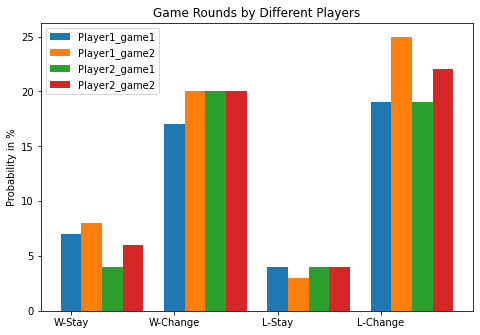

In [18]:
df_lst=[df_player1_1,df_player1_2,df_player2_1,df_player2_2]
prob_lst=[]
for i in df_lst:
    prob_val=full_operations(i)
    prob_lst.append(prob_val)

prob=[e for a in prob_lst for e in a]


data=[[7,17,4,19],[8,20,3,25],[4,20,4,19],[6,20,4,22]] # data has the same num as prob
labels=["W-Stay","W-Change","L-Stay","L-Change"]

X = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], width = 0.2,label='Player1_game1')
ax.bar(X + 0.2, data[1], width = 0.2,label='Player1_game2')
ax.bar(X + 0.40, data[2], width = 0.2,label='Player2_game1')
ax.bar(X + 0.6, data[3], width = 0.2,label='Player2_game2')
fig.tight_layout()
ax.set_ylabel('Probability in %')
ax.set_title('Game Rounds by Different Players')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Comments for further study

In [ ]:
# you could also try export and further analyse the df's that are returned.
# I did not save them to csv's.